In [1]:
%load_ext autoreload

%autoreload 2

In [96]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import string
import sys
from tqdm.notebook import tqdm

sys.path.append('/mnt/c/Users/conor/Git_Projects/PHD/December_Prognosis/')
from optimise_patient import Patient_opt

In [97]:
patients = pd.read_pickle('patient_df.pickle')

total = pd.read_pickle('/mnt/c/Users/conor/Git_Projects/PHD/December_Prognosis/December_Datat_32.pickle')
patients = total.groupby('Patient_Number').sample(1).reset_index().iloc[:,:44]#total = truncate(total, start=1000, end=1800)

In [106]:
po = Patient_opt(patients, copb=0.2, mutpb=0.10, n_indviduals=500, n_gens=500)

po.run_optimisation()

[autoreload of optimise_patient failed: Traceback (most recent call last):
  File "/home/conor/miniconda3/envs/PHD/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/conor/miniconda3/envs/PHD/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/conor/miniconda3/envs/PHD/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/conor/miniconda3/envs/PHD/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 839, in exec_module
  File "<frozen importlib._bootstrap_external>", line 976, in get_code
  File "<frozen importlib._bootstrap_external>", line 906, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frame

/home/conor/miniconda3/envs/PHD/lib/python3.8/site-packages/statsmodels/duration/survfunc.py:546: RuntimeWarning: divide by zero encountered in log
  denom = np.sqrt(nn) * np.log(self.surv_prob)


38.4891304923675 <0.0001


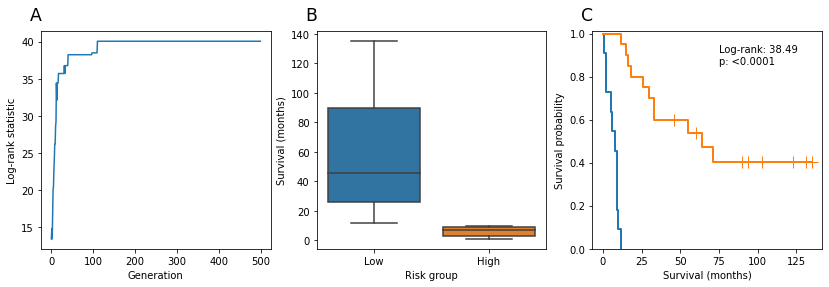

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4),ncols=3)

best = np.argmax(df['Fitnesses'])

duration = patients['survival (months)'].values
death_obs = (patients['DiedvsAlive'] == 'Died').values

fits = np.array([p['Fitnesses'].max() for p in po.results])
df = pd.DataFrame(po.results).iloc[[np.argmax(fits)],:]
best_ind = df['Fitnesses'].values[0].argmax()#[0]
groups = (df['Individuals'].values[0].squeeze()[best_ind,:]==1)

#groups = np.array(df['Individuals'][best])==1

patients['Groups'] = groups

# Perform log-rank test to determine statistic to maximise
stat, p = sm.duration.survdiff(duration, death_obs, groups)

sft = sm.SurvfuncRight(duration[groups], death_obs[groups])
lcb, ucb = sft.simultaneous_cb()
#ax.fill_between(sft.surv_times, lcb, ucb, color='lightblue')

sff = sm.SurvfuncRight(duration[~groups], death_obs[~groups])
lcb, ucb = sff.simultaneous_cb()
#ax.fill_between(sff.surv_times, lcb, ucb, color='orange')

ax1.plot(fits)
ax1.set_xlabel('Generation')
ax1.set_ylabel('Log-rank statistic')

sns.boxplot(data=patients, y='survival (months)', x='Opt_Group', ax=ax2)
ax2.set_ylabel('Survival (months)')
ax2.set_xlabel('Risk group')
ax2.set_xticklabels(['Low', 'High'])

sft.plot(ax=ax3);
sff.plot(ax=ax3);

li = ax3.get_lines()
li[0].set_color('tab:blue')
li[3].set_color('tab:orange')

ax3.set_xlabel('Survival (months)')
ax3.set_ylabel('Survival probability')

[ax.text(-0.05, 1.05, let, size='xx-large', transform=ax.transAxes) for ax, let in zip((ax1, ax2, ax3), string.ascii_uppercase)]

if p < 0.0001: p = '<0.0001'
ax3.text(0.55, 0.85, f'Log-rank: {stat:0.2f}\np: {p}', size='medium', transform=ax3.transAxes)

print(stat, p)
fig.savefig('/mnt/c/Users/conor/Git_Projects/PHD/December_Prognosis/Paper_Plots/Optimisation_Curve.pdf', bbox_inches='tight')

In [105]:
groups.sum()/groups.shape[0]

0.7096774193548387

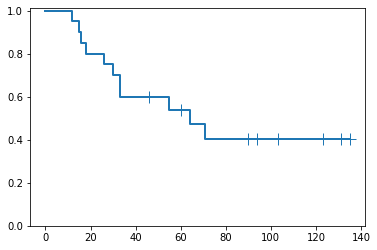

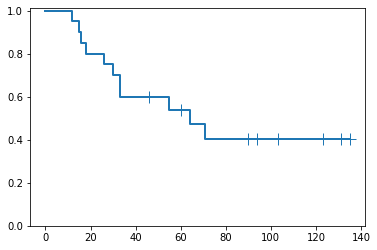

In [57]:
sft.plot()

In [58]:
ax2

<AxesSubplot:xlabel='Risk group', ylabel='Survival (months)'>